In [24]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', 40)
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns
%matplotlib inline
sns.set_style('darkgrid')
import plotly.express as px
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings('ignore');

In [25]:
df=pd.read_csv('C:/Users/Dell/Desktop/CARS.csv')

In [26]:
df.sample(5)

,Unnamed: 0,Make,Model,Variant,Ex-Showroom_Price,Displacement,Cylinders,Valves_Per_Cylinder,Drivetrain,Cylinder_Configuration,Emission_Norm,Engine_Location,Fuel_System,Fuel_Tank_Capacity,Fuel_Type,Height,Length,Width,Body_Type,Doors,...,Rear_Center_Armrest,iPod_Compatibility,ESP_(Electronic_Stability_Program),Cooled_Glove_Box,Recommended_Tyre_Pressure,Heated_Seats,Turbocharger,ISOFIX_(Child-Seat_Mount),Rain_Sensing_Wipers,Paddle_Shifters,Leather_Wrapped_Steering,Automatic_Headlamps,Engine_Type,ASR_/_Traction_Control,Cruise_Control,USB_Ports,Heads-Up_Display,Welcome_Lights,Battery,Electric_Range
1236,1236,Toyota,Yaris,J (O) Cvt,"Rs. 9,35,000",1496 cc,4.0,4.0,FWD (Front Wheel Drive),In-line,BS IV,NaN,Injection,42 litres,Petrol,1495 mm,4425 mm,1730 mm,Sedan,4.0,...,Cup Holders,NaN,NaN,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
256,256,NaN,Mercedes-Benz Cla-Class,200 Sport,"Rs. 35,99,000",1991 cc,4.0,4.0,FWD (Front Wheel Drive),In-line,BS IV,"Front, Transverse",Injection,56 litres,Petrol,1432 mm,4630 mm,1777 mm,Sedan,4.0,...,Cup Holders,Yes,Yes,Yes,NaN,NaN,NaN,Yes,Yes,Yes,Yes,Yes,NaN,Yes,Yes,NaN,NaN,NaN,NaN,NaN
572,572,Hyundai,Verna,1.6 Vtvt Sx,"Rs. 9,99,900",1591 cc,4.0,4.0,FWD (Front Wheel Drive),In-line,BS IV,"Front, Transverse",Injection,45 litres,Petrol,1445 mm,4440 mm,1729 mm,Sedan,4.0,...,Cup Holders,NaN,NaN,Yes,NaN,NaN,NaN,NaN,NaN,NaN,Yes,Yes,NaN,NaN,Yes,NaN,NaN,NaN,NaN,NaN
539,539,Maruti Suzuki,Vitara Brezza,Vdi,"Rs. 8,14,742",1248 cc,4.0,4.0,FWD (Front Wheel Drive),In-line,BS IV,"Front, Longitudinal",Injection,48 litres,Diesel,1640 mm,3995 mm,1790 mm,SUV,5.0,...,NaN,NaN,NaN,NaN,NaN,NaN,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
87,87,Toyota,Etios Liva,G,"Rs. 5,20,300",1197 cc,4.0,4.0,FWD (Front Wheel Drive),In-line,BS IV,"Front, Transverse",Injection,45 litres,Petrol,1510 mm,3884 mm,1695 mm,Hatchback,5.0,...,NaN,NaN,NaN,Yes,NaN,NaN,NaN,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [27]:
l_D = len(df)
c_m = len(df.Make.unique())
c_c = len(df.Model.unique())
n_f = len(df.columns)
fig = px.bar(x=['Observations',"Makers",'Models','Features'],y=[l_D,c_m,c_c,n_f], width=800,height=400)
fig.update_layout(
    title="Dataset Statistics",
    xaxis_title="",
    yaxis_title="Count",
    font=dict(
        size=16,
    )
)

fig.show()

In [28]:
df['car_name'] = df.Make + ' ' + df.Model
c = ['Make','Model','car_name','Variant','Body_Type','Fuel_Type','Fuel_System','Type','Drivetrain','Ex-Showroom_Price','Displacement','Cylinders',
     'ARAI_Certified_Mileage','Power','Torque','Fuel_Tank_Capacity','Height','Length','Width','Doors','Seating_Capacity','Wheelbase','Number_of_Airbags']
df_full = df.copy()

df['Ex-Showroom_Price'] = df['Ex-Showroom_Price'].str.replace('Rs. ','',regex=False)
df['Ex-Showroom_Price'] = df['Ex-Showroom_Price'].str.replace(',','',regex=False)
df['Ex-Showroom_Price'] = df['Ex-Showroom_Price'].astype(int)
df = df[c]
df = df[~df.ARAI_Certified_Mileage.isnull()]
df = df[~df.Make.isnull()]
df = df[~df.Width.isnull()]
df = df[~df.Cylinders.isnull()]
df = df[~df.Wheelbase.isnull()]
df = df[~df['Fuel_Tank_Capacity'].isnull()]
df = df[~df['Seating_Capacity'].isnull()]
df = df[~df['Torque'].isnull()]
df['Height'] = df['Height'].str.replace(' mm','',regex=False).astype(float)
df['Length'] = df['Length'].str.replace(' mm','',regex=False).astype(float)
df['Width'] = df['Width'].str.replace(' mm','',regex=False).astype(float)
df['Wheelbase'] = df['Wheelbase'].str.replace(' mm','',regex=False).astype(float)
df['Fuel_Tank_Capacity'] = df['Fuel_Tank_Capacity'].str.replace(' litres','',regex=False).astype(float)
df['Displacement'] = df['Displacement'].str.replace(' cc','',regex=False)
df.loc[df.ARAI_Certified_Mileage == '9.8-10.0 km/litre','ARAI_Certified_Mileage'] = '10'
df.loc[df.ARAI_Certified_Mileage == '10kmpl km/litre','ARAI_Certified_Mileage'] = '10'
df['ARAI_Certified_Mileage'] = df['ARAI_Certified_Mileage'].str.replace(' km/litre','',regex=False).astype(float)
df.Number_of_Airbags.fillna(0,inplace= True)
df['price'] = df['Ex-Showroom_Price'] * 0.014
df.drop(columns='Ex-Showroom_Price', inplace= True)
df.price = df.price.astype(int)
HP = df.Power.str.extract(r'(\d{1,4}).*').astype(int) * 0.98632
HP = HP.apply(lambda x: round(x,2))
TQ = df.Torque.str.extract(r'(\d{1,4}).*').astype(int)
TQ = TQ.apply(lambda x: round(x,2))
df.Torque = TQ
df.Power = HP
df.Doors = df.Doors.astype(int)
df.Seating_Capacity = df.Seating_Capacity.astype(int)
df.Number_of_Airbags = df.Number_of_Airbags.astype(int)
df.Displacement = df.Displacement.astype(int)
df.Cylinders = df.Cylinders.astype(int)
df.columns = ['make', 'model','car_name', 'variant', 'body_type', 'fuel_type', 'fuel_system','type', 'drivetrain', 'displacement', 'cylinders',
              'mileage', 'power', 'torque', 'fuel_tank','height', 'length', 'width', 'doors', 'seats', 'wheelbase','airbags', 'price']

In [29]:
df.sample(5)

,make,model,car_name,variant,body_type,fuel_type,fuel_system,type,drivetrain,displacement,cylinders,mileage,power,torque,fuel_tank,height,length,width,doors,seats,wheelbase,airbags,price
1249,Skoda,Octavia,Skoda Octavia,Onyx 1.8 Tsi Dsg,Sedan,Petrol,Injection,Automatic,FWD (Front Wheel Drive),1798,4,15.10,177.54,250,50.0,1476.0,4670.0,1814.0,4,5,2688.0,6,27994
342,Lamborghini,Urus,Lamborghini Urus,V8,SUV,Petrol,Injection,Automatic,AWD (All Wheel Drive),3996,8,7.80,641.11,850,75.0,1638.0,5112.0,2181.0,5,5,3003.0,8,420000
646,Mahindra,Marazzo,Mahindra Marazzo,M4 7 Str,MPV,Diesel,Injection,Manual,FWD (Front Wheel Drive),1497,4,17.30,119.34,300,45.0,1774.0,4585.0,1866.0,5,7,2760.0,2,16190
672,Mahindra,Xuv500,Mahindra Xuv500,W11 At,SUV,Diesel,Injection,Automatic,FWD (Front Wheel Drive),2179,4,16.00,152.88,330,70.0,1785.0,4585.0,1890.0,5,7,2700.0,6,25726
967,Mahindra,Xylo,Mahindra Xylo,H4 Abs Bs-Iv,SUV,Diesel,Injection,Manual,FWD (Front Wheel Drive),2179,4,14.02,118.36,280,55.0,1895.0,4520.0,1850.0,5,7,2760.0,0,14925


In [30]:
df[df.model =='Corolla Altis']

,make,model,car_name,variant,body_type,fuel_type,fuel_system,type,drivetrain,displacement,cylinders,mileage,power,torque,fuel_tank,height,length,width,doors,seats,wheelbase,airbags,price
734,Toyota,Corolla Altis,Toyota Corolla Altis,G Petrol,Sedan,Petrol,Injection,Manual,FWD (Front Wheel Drive),1798,4,16.7,138.08,173,55.0,1475.0,4620.0,1775.0,4,5,2700.0,3,23030
735,Toyota,Corolla Altis,Toyota Corolla Altis,G At Petrol,Sedan,Petrol,Injection,Automatic,FWD (Front Wheel Drive),1798,4,16.7,138.08,173,55.0,1475.0,4620.0,1775.0,4,5,2700.0,3,25284
736,Toyota,Corolla Altis,Toyota Corolla Altis,Gl Petrol,Sedan,Petrol,Injection,Manual,FWD (Front Wheel Drive),1798,4,16.7,138.08,173,55.0,1475.0,4620.0,1775.0,4,5,2700.0,7,26348
737,Toyota,Corolla Altis,Toyota Corolla Altis,Gl Diesel,Sedan,Diesel,Injection,Manual,FWD (Front Wheel Drive),1364,4,21.0,86.80,205,43.0,1475.0,4620.0,1775.0,4,5,2700.0,3,27104
738,Toyota,Corolla Altis,Toyota Corolla Altis,G Diesel,Sedan,Diesel,Injection,Manual,FWD (Front Wheel Drive),1364,4,21.0,86.80,205,43.0,1475.0,4620.0,1775.0,4,5,2700.0,3,24794
739,Toyota,Corolla Altis,Toyota Corolla Altis,Vl At Petrol,Sedan,Petrol,Injection,Automatic,FWD (Front Wheel Drive),1798,4,16.7,138.08,173,55.0,1475.0,4620.0,1775.0,4,5,2700.0,7,28266


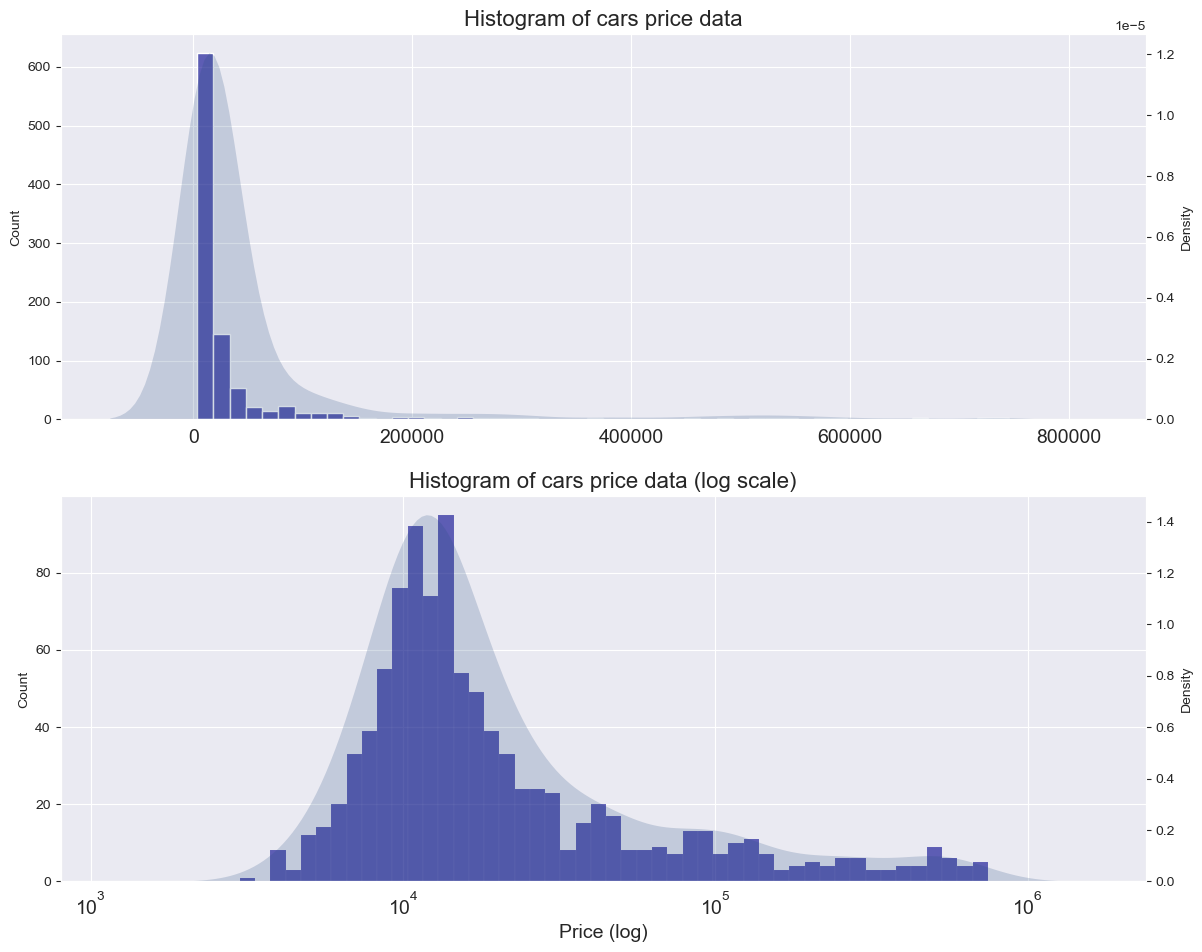

In [31]:
fig,(ax1,ax2) = plt.subplots(2,1,figsize=(14,11))
sns.histplot(data=df, x='price',bins=50, alpha=.6, color='darkblue', ax=ax1)
ax12 = ax1.twinx()
sns.kdeplot(data=df, x='price', alpha=.2,fill= True,color="#254b7f",ax=ax12,linewidth=0)
ax12.grid()
ax1.set_title('Histogram of cars price data',fontsize=16)
ax1.set_xlabel('')
logbins = np.logspace(np.log10(3000),np.log10(744944.578),50)
sns.histplot(data=df, x='price',bins=logbins,alpha=.6, color='darkblue',ax=ax2)
ax2.set_title('Histogram of cars price data (log scale)',fontsize=16)
ax2.set_xscale('log')
ax22 = ax2.twinx()
ax22.grid()
sns.kdeplot(data=df, x='price', alpha=.2,fill= True,color="#254b7f",ax=ax22,log_scale=True,linewidth=0)
ax2.set_xlabel('Price (log)', fontsize=14)
ax22.set_xticks((800,1000,10000,100000,1000000))
ax2.xaxis.set_tick_params(labelsize=14);
ax1.xaxis.set_tick_params(labelsize=14);

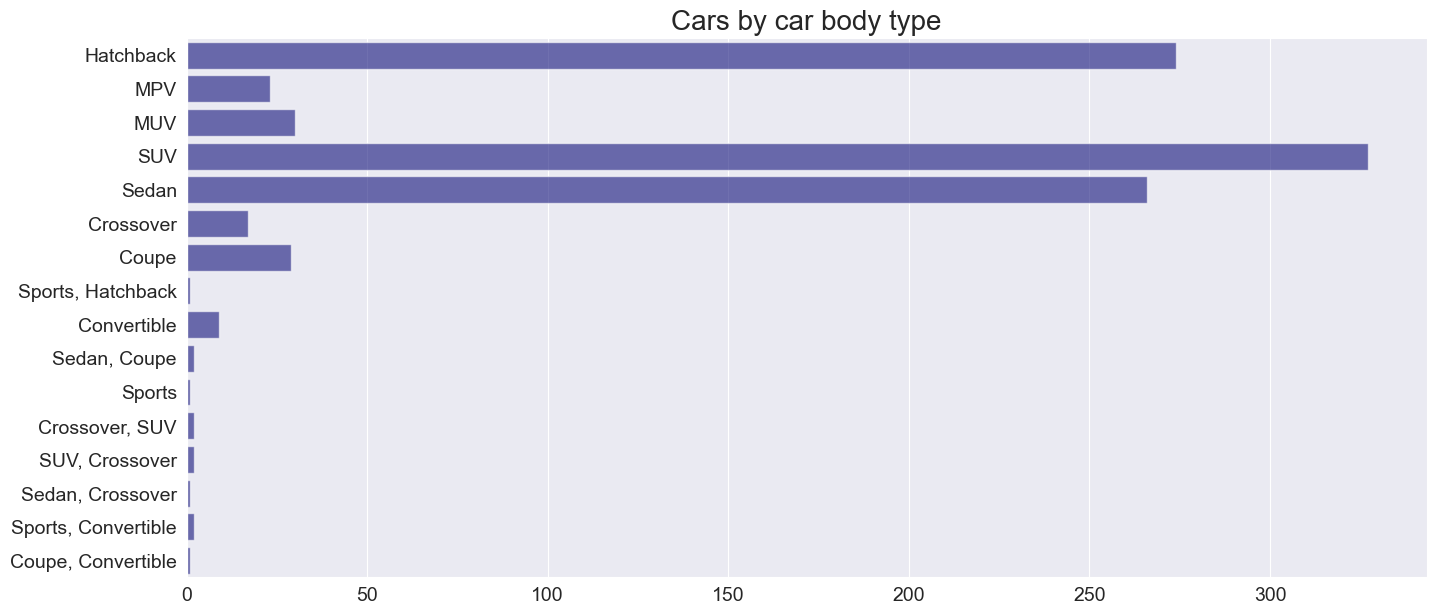

In [10]:
plt.figure(figsize=(16,7))
sns.countplot(data=df, y='body_type',alpha=.6,color='darkblue')
plt.title('Cars by car body type',fontsize=20)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('')
plt.ylabel('');